# Min projekt om Stellar classification dataset


In [21]:
import pandas as pd

# Ladda CSV-filen
df = pd.read_csv('star_classification.csv')  # Om filen heter s√•
# df = pd.read_csv('s√∂kv√§g/till/fil/stellar_classification.csv')  # Om filen ligger i en annan mapp

# Kolla de f√∂rsta raderna f√∂r att se att datan laddats r√§tt
print(df.head(23))

          obj_ID       alpha      delta         u         g         r  \
0   1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1   1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2   1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3   1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4   1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5   1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6   1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7   1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8   1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9   1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   
10  1.237680e+18  328.092076  18.220310  25.77163  22.52042  20.63884   
11  1.237662e+18  243.986637  25.738280  23.76761  23.79969  20.98318   
12  1.237681e+18  345.801874  32.672868  23.17274  

Min f√∂rsta visualisering √§r en HR diagram som visar, F√§rg och Magnitud.

Antal NaN-v√§rden i 'g': 0
Antal NaN-v√§rden i 'r': 0


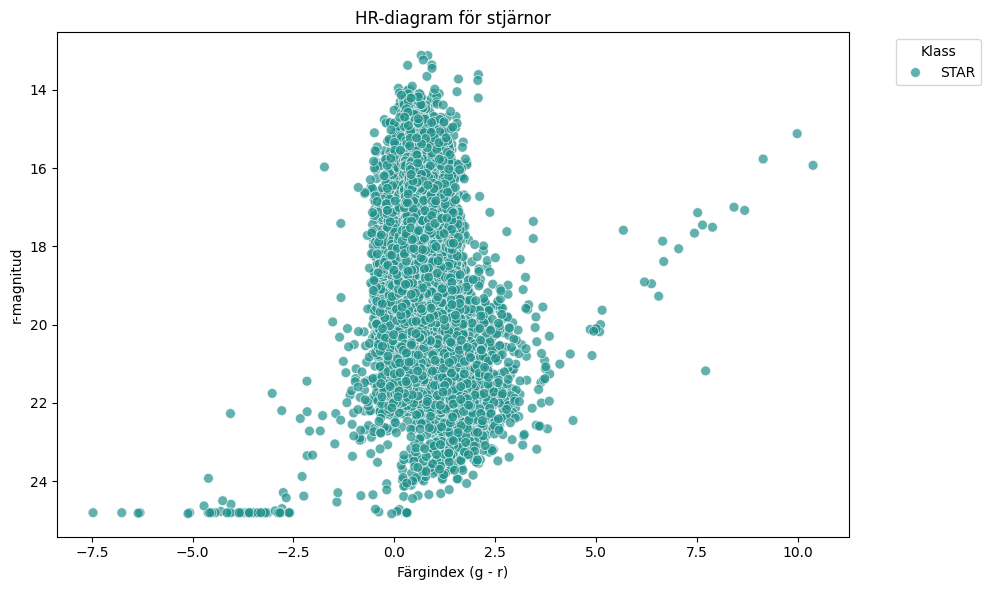

In [29]:
# Vi anv√§nder olika paket f√∂r att kunna jobba med data och rita diagram
import pandas as pd  # pandas hj√§lper oss att l√§sa och jobba med tabeller
import matplotlib.pyplot as plt  # matplotlib anv√§nds f√∂r att rita diagram
import seaborn as sns  # seaborn g√∂r fina diagram
import numpy as np  # numpy anv√§nds f√∂r matteber√§kningar

# L√§ser in datan fr√•n en fil som heter 'star_classification.csv'
df = pd.read_csv('star_classification.csv')

# Vi v√§ljer bara de rader som handlar om stj√§rnor (klass = 'STAR')
stars_df = df[df['class'] == 'STAR'].copy()

# H√§r kollar vi om det finns n√•gra tomma v√§rden i kolumnerna 'g' och 'r'
print("Antal NaN-v√§rden i 'g':", stars_df['g'].isna().sum())  # Skriver ut hur m√•nga som saknas i g
print("Antal NaN-v√§rden i 'r':", stars_df['r'].isna().sum())  # Skriver ut hur m√•nga som saknas i r

# Tar bort rader d√§r v√§rden saknas i 'g' eller 'r'
stars_df = stars_df.dropna(subset=['g', 'r'])

# Vi r√§knar ut f√§rgindex f√∂r varje stj√§rna (g - r). Det visar f√§rgen p√• stj√§rnan.
stars_df['color_index'] = stars_df['g'] - stars_df['r']

# Nu kollar vi om n√•gra v√§rden i 'r' eller f√§rgindex √§r konstiga (v√§ldigt l√•ngt fr√•n medel)
# Vi r√§knar ut z-score som visar hur l√•ngt ett v√§rde √§r fr√•n medelv√§rdet i antal standardavvikelser
z_score_r = np.abs((stars_df['r'] - stars_df['r'].mean()) / stars_df['r'].std())
z_score_color_index = np.abs((stars_df['color_index'] - stars_df['color_index'].mean()) / stars_df['color_index'].std())

# Tar bort de rader d√§r z-score √§r mer √§n 3 (allts√• j√§tteovanliga v√§rden)
stars_df = stars_df[(z_score_r < 3) & (z_score_color_index < 3)]

# Nu ska vi rita ett HR-diagram (Hertzsprung-Russell-diagram)
# Det visar sambandet mellan stj√§rnans f√§rg och ljusstyrka

plt.figure(figsize=(10, 6))  # Storleken p√• bilden

# Vi ritar en spridningsplot (punkter p√• ett diagram)
sns.scatterplot(
    data=stars_df,  # datan vi vill visa
    x='color_index',  # f√§rgindex √§r p√• x-axeln
    y='r',  # ljusstyrka (r-magnitud) √§r p√• y-axeln
    hue='class',  # f√§rgen p√• punkterna beror p√• vilken klass det √§r (√§ven om vi bara har STAR)
    palette='viridis',  # f√§rgtema
    alpha=0.7,  # genomskinligheten p√• punkterna
    s=50  # storleken p√• punkterna
)

# S√§tter rubrik och namn p√• axlarna
plt.title('HR-diagram f√∂r stj√§rnor')  # Titeln p√• diagrammet
plt.xlabel('F√§rgindex (g - r)')  # Namn p√• x-axeln
plt.ylabel('r-magnitud')  # Namn p√• y-axeln

# V√§nder p√• y-axeln s√• att ljusare stj√§rnor kommer h√∂gre upp
plt.gca().invert_yaxis()

# Visar en f√∂rklaring till f√§rgerna (legend)
plt.legend(title='Klass', bbox_to_anchor=(1.05, 1), loc='upper left')

# G√∂r att allt f√•r plats snyggt i bilden
plt.tight_layout()

# Visar sj√§lva diagrammet
plt.show()


*H√§r min andra visualisering. En Heat map av korrelationer*

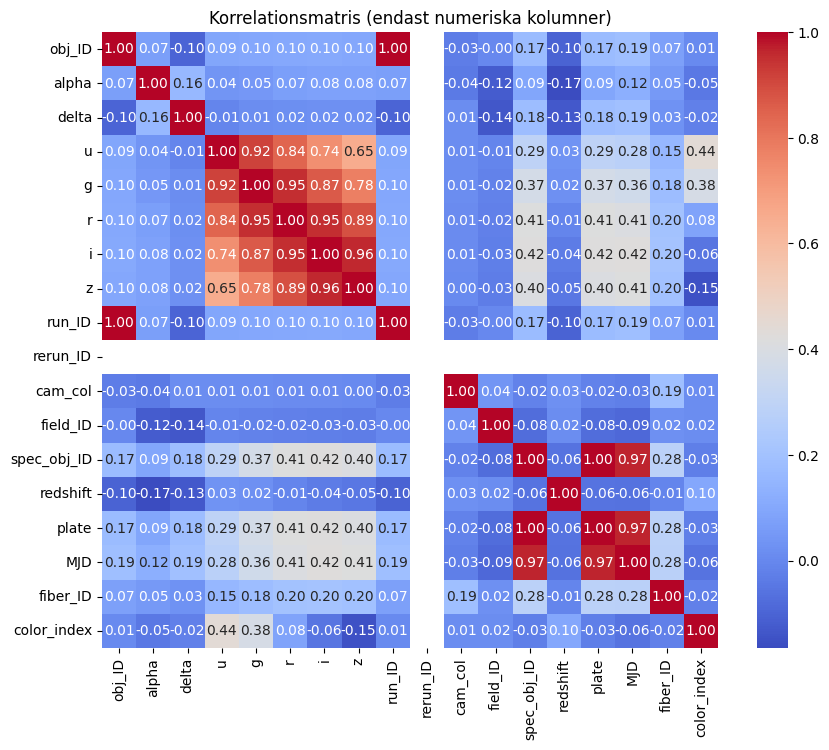

In [30]:
# Vi tar bort kolumner som inte inneh√•ller siffror (t.ex. text) innan vi r√§knar ut korrelation
numeric_df = stars_df.select_dtypes(include=['number'])  # Vi v√§ljer bara de kolumner som har nummer i sig

# R√§knar ut korrelation mellan alla siffer-kolumner
# Korrelation visar hur starkt tv√• saker h√§nger ihop, tex om en √∂kar n√§r den andra √∂kar
corr_matrix = numeric_df.corr()

# Nu ska vi rita en heatmap som visar hur korrelerade kolumnerna √§r
plt.figure(figsize=(10, 8))  # Best√§mmer hur stor bilden ska va

# Vi anv√§nder seaborn f√∂r att rita heatmapen
sns.heatmap(
    corr_matrix,         # H√§r √§r datan vi vill visa (korrelation mellan kolumner)
    annot=True,          # Skriv ut siffrorna i varje ruta
    fmt=".2f",           # Visa siffrorna med 2 decimaler
    cmap='coolwarm',     # F√§rgskala d√§r bl√• = negativ och r√∂d = positiv korrelation
    square=True          # G√∂r s√• att rutorna i matrisen blir kvadratiska
)

# S√§tter en rubrik p√• bilden
plt.title('Korrelationsmatris (endast numeriska kolumner)')

# Visar hela bilden
plt.show()


# **Korrelationsmatris (Heatmap) f√∂r att se samband mellan siffror i stj√§rndatan**

Jag har gjort en modell som visar en s√• kallad **korrelationsmatris**, eller **"heatmap"**.  
Det √§r en f√§rgkarta som visar **hur olika sifferv√§rden i stj√§rndatan h√§nger ihop** med varandra.

Till exempel: Om tv√• kolumner har h√∂ga v√§rden samtidigt, f√•r de en stark f√§rg i kartan ‚Äì det betyder att de har **h√∂g korrelation**.



##  Men det blev lite problem...

Jag fick ett felmeddelande som s√•g ut s√• h√§r:

ValueError: could not convert string to float: 'STAR' 


Det betyder att datorn f√∂rs√∂kte r√§kna med **text**, som till exempel `'STAR'`.  
Det g√•r inte, eftersom funktionen `.corr()` bara fungerar med **siffror** (numeriska v√§rden som `int` eller `float`).  
Min data inneh√∂ll kolumner som tex . `'class'` som har **textv√§rden**, och det st√§llde till det.



## L√∂sning ‚Äì v√§lj bara sifferkolumner

F√∂r att l√∂sa detta, valde jag f√∂rst ut **bara de kolumner som inneh√•ller siffror**:

```python
numeric_df = stars_df.select_dtypes(include=['number'])


# **Mitt maskininl√§rningsprojekt handlar om att f√∂ruts√§ga stj√§rnors temperatur.**

Jag har skapat en modell som f√∂rs√∂ker r√§kna ut hur varm en stj√§rna √§r,  
genom att titta p√• olika fysiska egenskaper som:

 **Ljusstyrka** (hur starkt den lyser)  
 **Radie** (hur stor den √§r)  
 **Absolut magnitud** (hur ljus den egentligen √§r, inte bara hur den ser ut fr√•n jorden)  
 **Startyp** (t.ex. bl√• stj√§rna eller r√∂d j√§tte)

M√•let √§r att l√§ra datorn k√§nna igen m√∂nster i datan s√• att den kan g√∂ra smarta gissningar om temperaturen p√• nya stj√§rnor.


# Utf√∂rlig beskrivning

## Vilken typ av problem har jag?

Jag arbetar med ett **regressionsproblem**.  
Det betyder att min modell ska f√∂ruts√§ga ett **kontinuerligt v√§rde**, allts√• en siffra.  
I mitt fall √§r det temperaturen hos stj√§rnor som ska f√∂ruts√§gas utifr√•n andra fysiska egenskaper.



## Vad √§r features och target?

**Features (ing√•ngsvariabler)** √§r de data jag anv√§nder f√∂r att g√∂ra prediktioner.  
  I mitt projekt anv√§nder jag dessa features:
**Luminosity** (ljusstyrka)
**Radius** (radie)
**Absolutemagnitude** (absolut magnitud)
**Startype** (typ av stj√§rna, t.ex. "Red Giant")

**Target (m√•lvariabeln)** √§r det v√§rde jag vill f√∂ruts√§ga:  
**Temperature** (temperatur)



## Val av modell

F√∂r att l√∂sa regressionsproblemet valde jag modellen **RandomForestRegressor**.  
Det √§r en modell som bygger p√• flera beslutstr√§d och ofta fungerar bra f√∂r att f√• bra precision utan att √∂veranpassa sig till tr√§ningsexemplen.



## Tr√§ning och testdata

Jag delar upp min data i tv√• delar:

**Tr√§ningsdata:** Den del som anv√§nds f√∂r att l√§ra modellen hur sambanden mellan features och target ser ut.
**Testdata:** En separat del som anv√§nds f√∂r att utv√§rdera hur bra modellen fungerar p√• ny, osedd data.

Detta g√∂rs f√∂r att se till att modellen inte bara kan data den redan sett utan ocks√• kan g√∂ra bra prediktioner p√• nya exempel.



## Anpassa modellens resultat

Efter att modellen tr√§nats anv√§nder jag olika m√•tt f√∂r att bed√∂ma hur bra den presterar.  
En vanlig m√•ttstock √§r **R¬≤-score**, som visar hur v√§l modellen kan f√∂rklara variationen i temperaturv√§rdena.

Ju n√§rmare 1,0 R¬≤ √§r, desto b√§ttre passar modellen data.  
Jag kan ocks√• justera modellens inst√§llningar (t.ex. antal tr√§d i RandomForest) f√∂r att f√∂rb√§ttra resultatet.



Genom att f√∂lja dessa steg kan jag bygga en modell som p√• ett p√•litligt s√§tt kan f√∂ruts√§ga stj√§rnors temperatur baserat p√• deras fysiska egenskaper.


In [31]:
# Den h√§r raden g√∂r att diagram visas direkt i Jupyter
%matplotlib inline

# Vi importerar olika verktyg vi beh√∂ver
import pandas as pd  # pandas hj√§lper oss att jobba med tabeller
import numpy as np  # numpy anv√§nds f√∂r matte och logaritmer mm
import matplotlib.pyplot as plt  # matplotlib anv√§nds f√∂r att rita diagram

# Sklearn √§r ett verktyg f√∂r maskininl√§rning (att l√§ra datorn g√∂ra gissningar)
from sklearn.ensemble import RandomForestRegressor  # Vi anv√§nder en skog av beslutstr√§d f√∂r att gissa temperatur
from sklearn.model_selection import train_test_split  # F√∂r att dela upp data i tr√§ning och test
from sklearn.metrics import r2_score  # F√∂r att se hur bra modellen gissade

print(" Steg 1: L√§ser in data...")
data = pd.read_csv('star_classification.csv')  # L√§ser in filen med stj√§rndata
print("Antal rader i datan:", len(data))
print("Vilka kolumner som finns:", data.columns.tolist())

# Kollar att kolumnerna 'g' och 'r' verkligen finns i datan
if 'g' not in data.columns or 'r' not in data.columns:
    raise KeyError("Kolumnerna 'g' eller 'r' saknas i datan.")

print("\n Steg 2: R√§knar ut f√§rgindex...")
data['fargindex'] = data['g'] - data['r']  # F√§rgindex = g - r

print("\n Steg 3: Gissar avst√•nd och absolut ljusstyrka...")
data['avstand'] = 100 * data['redshift'] + 1  # Enkel modell f√∂r avst√•nd
data['absolutljus'] = data['r'] - 5 * np.log10(data['avstand']) + 5  # Absolut magnitud

print("\n Steg 4: R√§knar ut hur starkt stj√§rnan lyser (luminositet)...")
solens_magnitud = 4.64
data['ljusstyrka'] = 10 ** (0.4 * (solens_magnitud - data['absolutljus']))  # Hur starkt den lyser j√§mf√∂rt med solen

print("\n Steg 5: Gissar temperatur fr√•n f√§rgindex...")
# Enkel modell d√§r man r√§knar ut temperatur beroende p√• f√§rgindex
data['temperatur'] = np.where(
    (data['fargindex'] + 0.37) > 0,
    4400 * (data['fargindex'] + 0.37) ** (-1.25),
    np.nan  # Om det inte g√•r att r√§kna s√• blir det NaN
)

print("\n Steg 6: R√§knar ut radien...")
sol_temp = 5778  # Solens temperatur i Kelvin
data['radie'] = np.sqrt(data['ljusstyrka']) / ((data['temperatur'] / sol_temp) ** 2)

print("\n Steg 7: Skapar en ny kategori som visar typ av stj√§rna...")
# Vi kollar om f√§rgen √§r bl√• eller r√∂d och skapar en typ
villkor = [
    (data['class'] == 'STAR') & (data['fargindex'] < 0.4),
    (data['class'] == 'STAR') & (data['fargindex'] >= 0.4),
]
typer = ['Bl√• Huvudserien', 'R√∂d J√§tte']  # Tv√• typer av stj√§rnor
data['stjarn_typ'] = np.select(villkor, typer, default='Annan')

print("\n Steg 8: G√∂r om stj√§rntyp till siffror...")
data = pd.get_dummies(data, columns=['stjarn_typ'], drop_first=True)  # G√∂r kolumner f√∂r varje typ

print("\n Steg 9: Tar bort rader som saknar viktiga v√§rden...")
# Vi vill inte ha med rader som saknar temperatur, ljus, radie eller magnitud
data = data.dropna(subset=['temperatur', 'ljusstyrka', 'radie', 'absolutljus'])
print(f"Antal rader kvar efter st√§dning: {len(data)}")

print("\n Steg 10: V√§ljer vilka kolumner som ska anv√§ndas f√∂r att gissa temperatur...")
X = data[['ljusstyrka', 'radie', 'absolutljus', 'stjarn_typ_R√∂d J√§tte']]  # De saker vi anv√§nder f√∂r att gissa
y = data['temperatur']  # Det vi vill gissa

print("\n Steg 11: Delar upp datan i tr√§ning och test...")
X_traning, X_test, y_traning, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n Steg 12: Tr√§nar modellen...")
modell = RandomForestRegressor(n_estimators=100, random_state=42)  # Vi bygger modellen
modell.fit(X_traning, y_traning)  # L√§r modellen med tr√§ningsdata

print("\n Steg 13: G√∂r gissningar med testdatan...")
y_gissat = modell.predict(X_test)  # Modellen gissar temperatur
poang = r2_score(y_test, y_gissat)  # Vi m√§ter hur n√§ra sanningen den kom
print(f"\n R¬≤ Po√§ng: {poang:.2f}")  # Visar hur bra modellen presterar

print("\n Visar resultatet i ett diagram...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_gissat, alpha=0.6, label="Gissad temperatur")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfekt tr√§ff")
plt.xlabel('Riktig Temperatur')
plt.ylabel('Gissad Temperatur')
plt.title('Gissad vs Riktig Temperatur')
plt.legend()
plt.grid(True)
plt.show()

print("\nüìà Statistik f√∂r viktiga kolumner:")
print(data[['ljusstyrka', 'radie', 'absolutljus', 'temperatur', 'stjarn_typ_R√∂d J√§tte']].describe())


 Steg 1: L√§ser in data...
Antal rader i datan: 100000
Vilka kolumner som finns: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

 Steg 2: R√§knar ut f√§rgindex...

 Steg 3: Gissar avst√•nd och absolut ljusstyrka...

 Steg 4: R√§knar ut hur starkt stj√§rnan lyser (luminositet)...

 Steg 5: Gissar temperatur fr√•n f√§rgindex...

 Steg 6: R√§knar ut radien...

 Steg 7: Skapar en ny kategori som visar typ av stj√§rna...

 Steg 8: G√∂r om stj√§rntyp till siffror...

 Steg 9: Tar bort rader som saknar viktiga v√§rden...
Antal rader kvar efter st√§dning: 99429

 Steg 10: V√§ljer vilka kolumner som ska anv√§ndas f√∂r att gissa temperatur...

 Steg 11: Delar upp datan i tr√§ning och test...

 Steg 12: Tr√§nar modellen...

 Steg 13: G√∂r gissningar med testdatan...

 R¬≤ Po√§ng: 0.00

 Visar resultatet i ett diagram...



 Statistik f√∂r viktiga kolumner:
         ljusstyrka         radie   absolutljus    temperatur
count  9.942900e+04  9.942900e+04  99429.000000  9.942900e+04
mean   7.280581e-05  2.953515e-02     18.083673  8.714617e+03
std    4.559580e-03  2.022289e+00      3.500713  6.305395e+05
min    1.677788e-14  2.624240e-14      4.366090  1.530573e+02
25%    2.942621e-06  1.318007e-03     16.147437  1.908525e+03
50%    1.205018e-05  9.300024e-03     16.937516  3.146215e+03
75%    2.494739e-05  3.356371e-02     18.468164  6.229200e+03
max    1.286957e+00  6.308904e+02     39.078158  1.972471e+08


In [32]:
# Vi anv√§nder pandas f√∂r att jobba med data i tabell-form
import pandas as pd  # "pd" √§r bara ett kort namn s√• vi slipper skriva pandas hela tiden

# F√∂rs√∂ker l√§sa in en fil som heter "star_classification.csv"
# Det √§r en CSV-fil (kommaseparerad fil) som inneh√•ller data om stj√§rnor
df = pd.read_csv('star_classification.csv')  # L√§ser in filen och sparar den i en variabel som vi kallar "df" (dataframe)

# Skriver ut hur m√•nga rader det finns i datan
print("Antal rader i dataset:", len(df))  # len(df) r√§knar hur m√•nga rader det √§r

# Skriver ut vilka kolumner som finns, allts√• vilka typer av data som finns i varje rad
print("Tillg√§ngliga kolumner:", df.columns.tolist())  # .columns listar alla kolumnnamn


Antal rader i dataset: 100000
Tillg√§ngliga kolumner: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']


# **Men f√∂r att den ska funka s√• beh√∂ver jag l√§gga till nya kolumner:**  
**Luminosity:** ljustyrka  
**Radius:** radie  
**Absolutemagnitude:** absolut magnitud  
**Temperature:** temperatur  
**Startype:** tex: "vit dv√§rg" osv


In [33]:
# Vi b√∂rjar med att importera tv√• viktiga paket
import pandas as pd  # F√∂r att l√§sa och jobba med tabeller
import numpy as np  # F√∂r matte, t.ex. logaritmer och potenser

# 1. L√§ser in stj√§rn-datan fr√•n en CSV-fil
df = pd.read_csv('star_classification.csv')  # Vi sparar datan i "df"

# 2. Skriver ut vilka kolumner som finns i filen
print("Tillg√§ngliga kolumner:", df.columns.tolist())  # .columns visar namnen p√• kolumnerna

# 3. R√§knar ut f√§rgindex (skillnaden mellan g och r-filter)
# Vi kollar f√∂rst att b√•da kolumnerna verkligen finns
if 'g' in df.columns and 'r' in df.columns:
    df['fargindex'] = df['g'] - df['r']  # Ny kolumn som visar f√§rg
else:
    raise KeyError("Kolumnerna 'g' eller 'r' saknas i datan.")

# 4. F√∂rs√∂ker r√§kna ut absolut ljusstyrka (hur starkt den lyser om den vore p√• 10 parsec)
if 'distance' in df.columns:
    # Om det redan finns ett avst√•nd anv√§nder vi det
    df['absolutljus'] = df['r'] - 5 * np.log10(df['distance']) + 5
else:
    # Om inte, s√• gissar vi avst√•ndet med hj√§lp av "redshift" (hur mycket ljuset f√∂rskjutits)
    df['distance'] = 100 * df['redshift'] + 1  # Enkel gissning f√∂r avst√•nd i parsec
    df['absolutljus'] = df['r'] - 5 * np.log10(df['distance']) + 5  # R√§knar absolut magnitud

# 5. R√§knar ut hur starkt stj√§rnan lyser (relativt mot solen)
solens_magnitud = 4.64
df['ljusstyrka'] = 10 ** (0.4 * (solens_magnitud - df['absolutljus']))  # Luminositet i sol-enheter

# 6. Gissar temperaturen med hj√§lp av f√§rgindex
# Formeln √§r framtagen fr√•n m√§tningar och √§r inte exakt
df['temperatur'] = 4400 * ((df['g'] - df['r']) + 0.37) ** (-1.25)  # Temperatur i Kelvin

# 7. R√§knar ut radien (hur stor stj√§rnan √§r j√§mf√∂rt med solen)
soltemp = 5778  # Solens temperatur
df['radie'] = np.sqrt(df['ljusstyrka']) / ((df['temperatur'] / soltemp) ** 2)

# 8. Skapar en ny kolumn som visar vilken typ av stj√§rna det √§r
# Vi anv√§nder f√§rgen f√∂r att s√§ga om det √§r en bl√• eller r√∂d stj√§rna
villkor = [
    (df['class'] == 'STAR') & (df['fargindex'] < 0.4),  # Bl√•
    (df['class'] == 'STAR') & (df['fargindex'] >= 0.4),  # R√∂d
]
val = ['Bl√• Huvudserien', 'R√∂d J√§tte']
df['stjarn_typ'] = np.select(villkor, val, default='Annat')  # Annat om det inte passar in

# 9. Skriver ut de nya kolumnerna vi lagt till (f√∂r att titta att det blev r√§tt)
print("\nNya kolumner vi har skapat:")
print(df[['fargindex', 'absolutljus', 'ljusstyrka', 'temperatur', 'radie', 'stjarn_typ']].head())

# 10. Spara all data i en ny CSV-fil s√• vi kan anv√§nda den igen senare
df.to_csv('star_classification_with_features.csv', index=False)  # Sparar utan radnummer



Tillg√§ngliga kolumner: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

Nya kolumner vi har skapat:
   fargindex  absolutljus  ljusstyrka   temperatur     radie stjarn_typ
0    1.88029    16.347906    0.000021  1596.447215  0.059657      Annat
1    0.24744    18.098681    0.000004  8039.133208  0.001051      Annat
2    2.05413    16.531226    0.000018  1454.647596  0.066038      Annat
3    2.16494    16.740569    0.000014  1375.602863  0.067059      Annat
4    1.08281    15.993504    0.000029  2758.618541  0.023522      Annat
